> Check this Repo out: https://github.com/kuangliu/pytorch-cifar Links to an external site. 

> You are going to follow the same structure for your Code from now on. So 

 *   Create:
models folder - this is where you'll add all of your future models. 

*   Copy resnet.py into this folder, this file should only have ResNet 18/34 models. Delete Bottleneck Class

*   main.py - from Google Colab, now onwards, this is the file that you'll import (along with the model). Your main file shall be able to take these params or you should be able to pull functions from it and then perform operations, like (including but not limited to):

    > training and test loops

    > data split between test and train

    > epochs

    > batch size

    > which optimizer to run

    > do we run a scheduler?

*   utils.py file (or a folder later on when it expands) - this is where you will add all of your utilities like:

    > image transforms,

    > gradcam,

    > misclassification code,

    > tensorboard related stuff

    > advanced training policies, etc etc


*   Name this main repos something, and don't call it Assignment 7. This is what you'll import for all the rest of the assignments. Add a proper readme describing all the files. 

*   Your assignment is to build the above training structure. Train ResNet18 on Cifar10 for 20 Epochs. The assignment must:

    > pull your Github code to google colab (don't copy-paste code)

    > prove that you are following the above structure

    > that the code in your google collab notebook is NOTHING.. barely anything. There should not be any function or class that you can define in your Google Colab Notebook. Everything must be imported from all of your other files

*  your colab file must:

    > train resnet18 for 20 epochs on the CIFAR10 dataset

    > show loss curves for test and train datasets

    > show a gallery of 10 misclassified images

    > show gradcam Links to an external site.output on 10 misclassified images. Remember if you are applying GradCAM on a channel that is less than 5px, then please don't bother to submit the assignment. 😡🤬🤬🤬🤬

    > Once done, upload the code to GitHub, and share the code. This readme must link to the main repo so we can read your file structure. 


1.   [EVA8_API](https://github.com/ojhajayant/EVA8_API) is the main repo which is being clone here to be able to run the main.py script with various user provided (or default) arg options.

2.   The LR-Range test over 100 epochs, as required for the One Cycle Policy (OCP) gave a max_lr(best_lr) of 0.050499

3.   Trained for 20 epochs as required, the div_factor was taken as 10, so as to start the cycle with a learning rate of best_lr/10 = 0.0050499, wanetd to have same number of epochs for taking from min_lr to max_lr and vice-versa, with NO annihilation epochs, hence final_div_factor = div_factor & MAX_LR_EPOCH = EPOCHS // 2 thus resulting in PCT_START = MAX_LR_EPOCH / EPOCHS = 0.5

4.  Here are the different args values for this run:

	> cmd : Either of "lr_find", "train", "test"

	> IPYNB_ENV : True

	> use_albumentations : True

	> SEED : 1

	> dataset : CIFAR10

	> img_size : (32, 32)

	> batch_size : 128
  
  >	epochs : 20

	> criterion : NLLLoss()

	> init_lr : 0.0001 (for LR-Range test)

	> end_lr : 0.05 (for LR-Range test)

	> lr_range_test_epochs : 100 (epochs used for LR-Range test)

	> best_lr : 0.504999999999

	> cycle_momentum : True

	> optimizer : <class 'torch.optim.sgd.SGD'>

	> cuda : True

	> dropout : 0.08

	> l1_weight : 2.5e-05

	> l2_weight_decay : 0.0002125

	> L1 : True

	> L2 : False

	> data : ./data/

	> best_model_path : ./saved_models/

	> prefix : data

	> best_model :  CIFAR10_model_epoch-20_L1-1_L2-0_val_acc-90.6.h5


5.  max test/validation accuracy within 20 epochs = 90.60%







In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Feb 10 05:31:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    51W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 18.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [3]:
%matplotlib notebook

##  Install the EVA8 packages, hosted @ github

In [4]:
!pip install git+https://git@github.com/ojhajayant//EVA8_API.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/ojhajayant//EVA8_API.git to /tmp/pip-req-build-tce7kp44
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/ojhajayant//EVA8_API.git' /tmp/pip-req-build-tce7kp44
  Resolved https://****@github.com/ojhajayant//EVA8_API.git to commit a872c6427cb0263213d1bd4c919db4e70083654e
  Preparing metadata (setup.py) ... done
  Created wheel for EVA8-API: filename=EVA8_API-0.0.0-py3-none-any.whl size=24096 sha256=88a6107066944188f11e52a7a64e0ac591da376258c82a1abc11c4311ef1fa51
  Stored in directory: /tmp/pip-ephem-wheel-cache-z2nh5h4p/wheels/5a/75/07/3896c73523adfee1c7bbad204b8ebeba4397d8209609d9a168
Successfully built EVA8-API


In [5]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


In [6]:
!pip install albumentations --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 4.6 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [7]:
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=b0f7cedf79b9430be127ca044cc75308c20bb27b5ec7aa0d9d1689ea7fc86a5e
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [8]:
!git clone https://git@github.com/ojhajayant//EVA8_API.git

Cloning into 'EVA8_API'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 181 (delta 56), reused 10 (delta 10), pack-reused 99
Receiving objects: 100% (181/181), 111.94 KiB | 2.24 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [9]:
%cd EVA8_API



/content/EVA8_API


In [10]:
%pwd

'/content/EVA8_API'

### Run the main.py script to enable the LR Range test

> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence intend to plot the files separately in separate cell.

In [11]:
%matplotlib widget
!python /content/EVA8_API/main.py --cmd lr_find

CUDA Available? True

	Here are the different args values for this run:
	cmd : lr_find
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 128
	epochs : 20
	criterion : NLLLoss()
	init_lr : 0.0001
	end_lr : 0.05
	lr_range_test_epochs : 100
	best_lr : 0.504999999999
	cycle_momentum : True
	optimizer : <class 'torch.optim.sgd.SGD'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  
100% 170498071/170498071 [00:01<00:00, 103931801.61it/s]
Extracting ./data/cifar-10-python.tar.gz to ./data

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Dat

### Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence plot the *png plot files separately in separate cell.

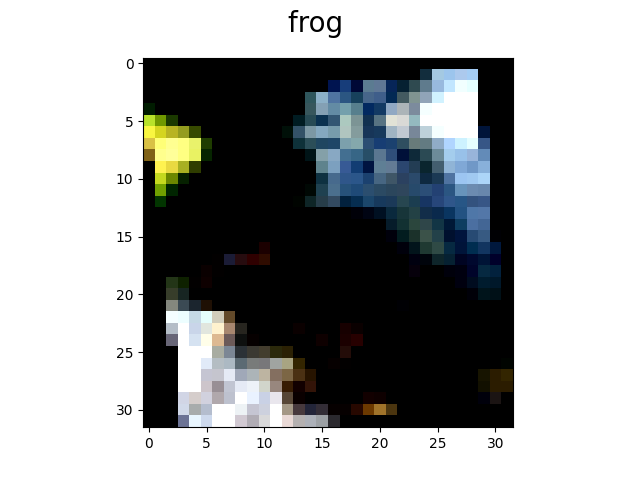

In [18]:
# Display the plot in the notebook
from IPython.display import Image
Image(filename='plot1.png')

#### Before transform

> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence plot the *png plot files separately in separate cell.

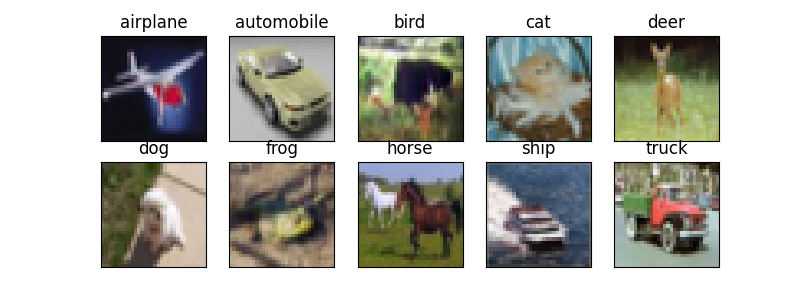

In [19]:
# Display the plot in the notebook
from IPython.display import Image
Image(filename='plot2.png')

#### After transform


> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence plot the *png plot files separately in separate cell.

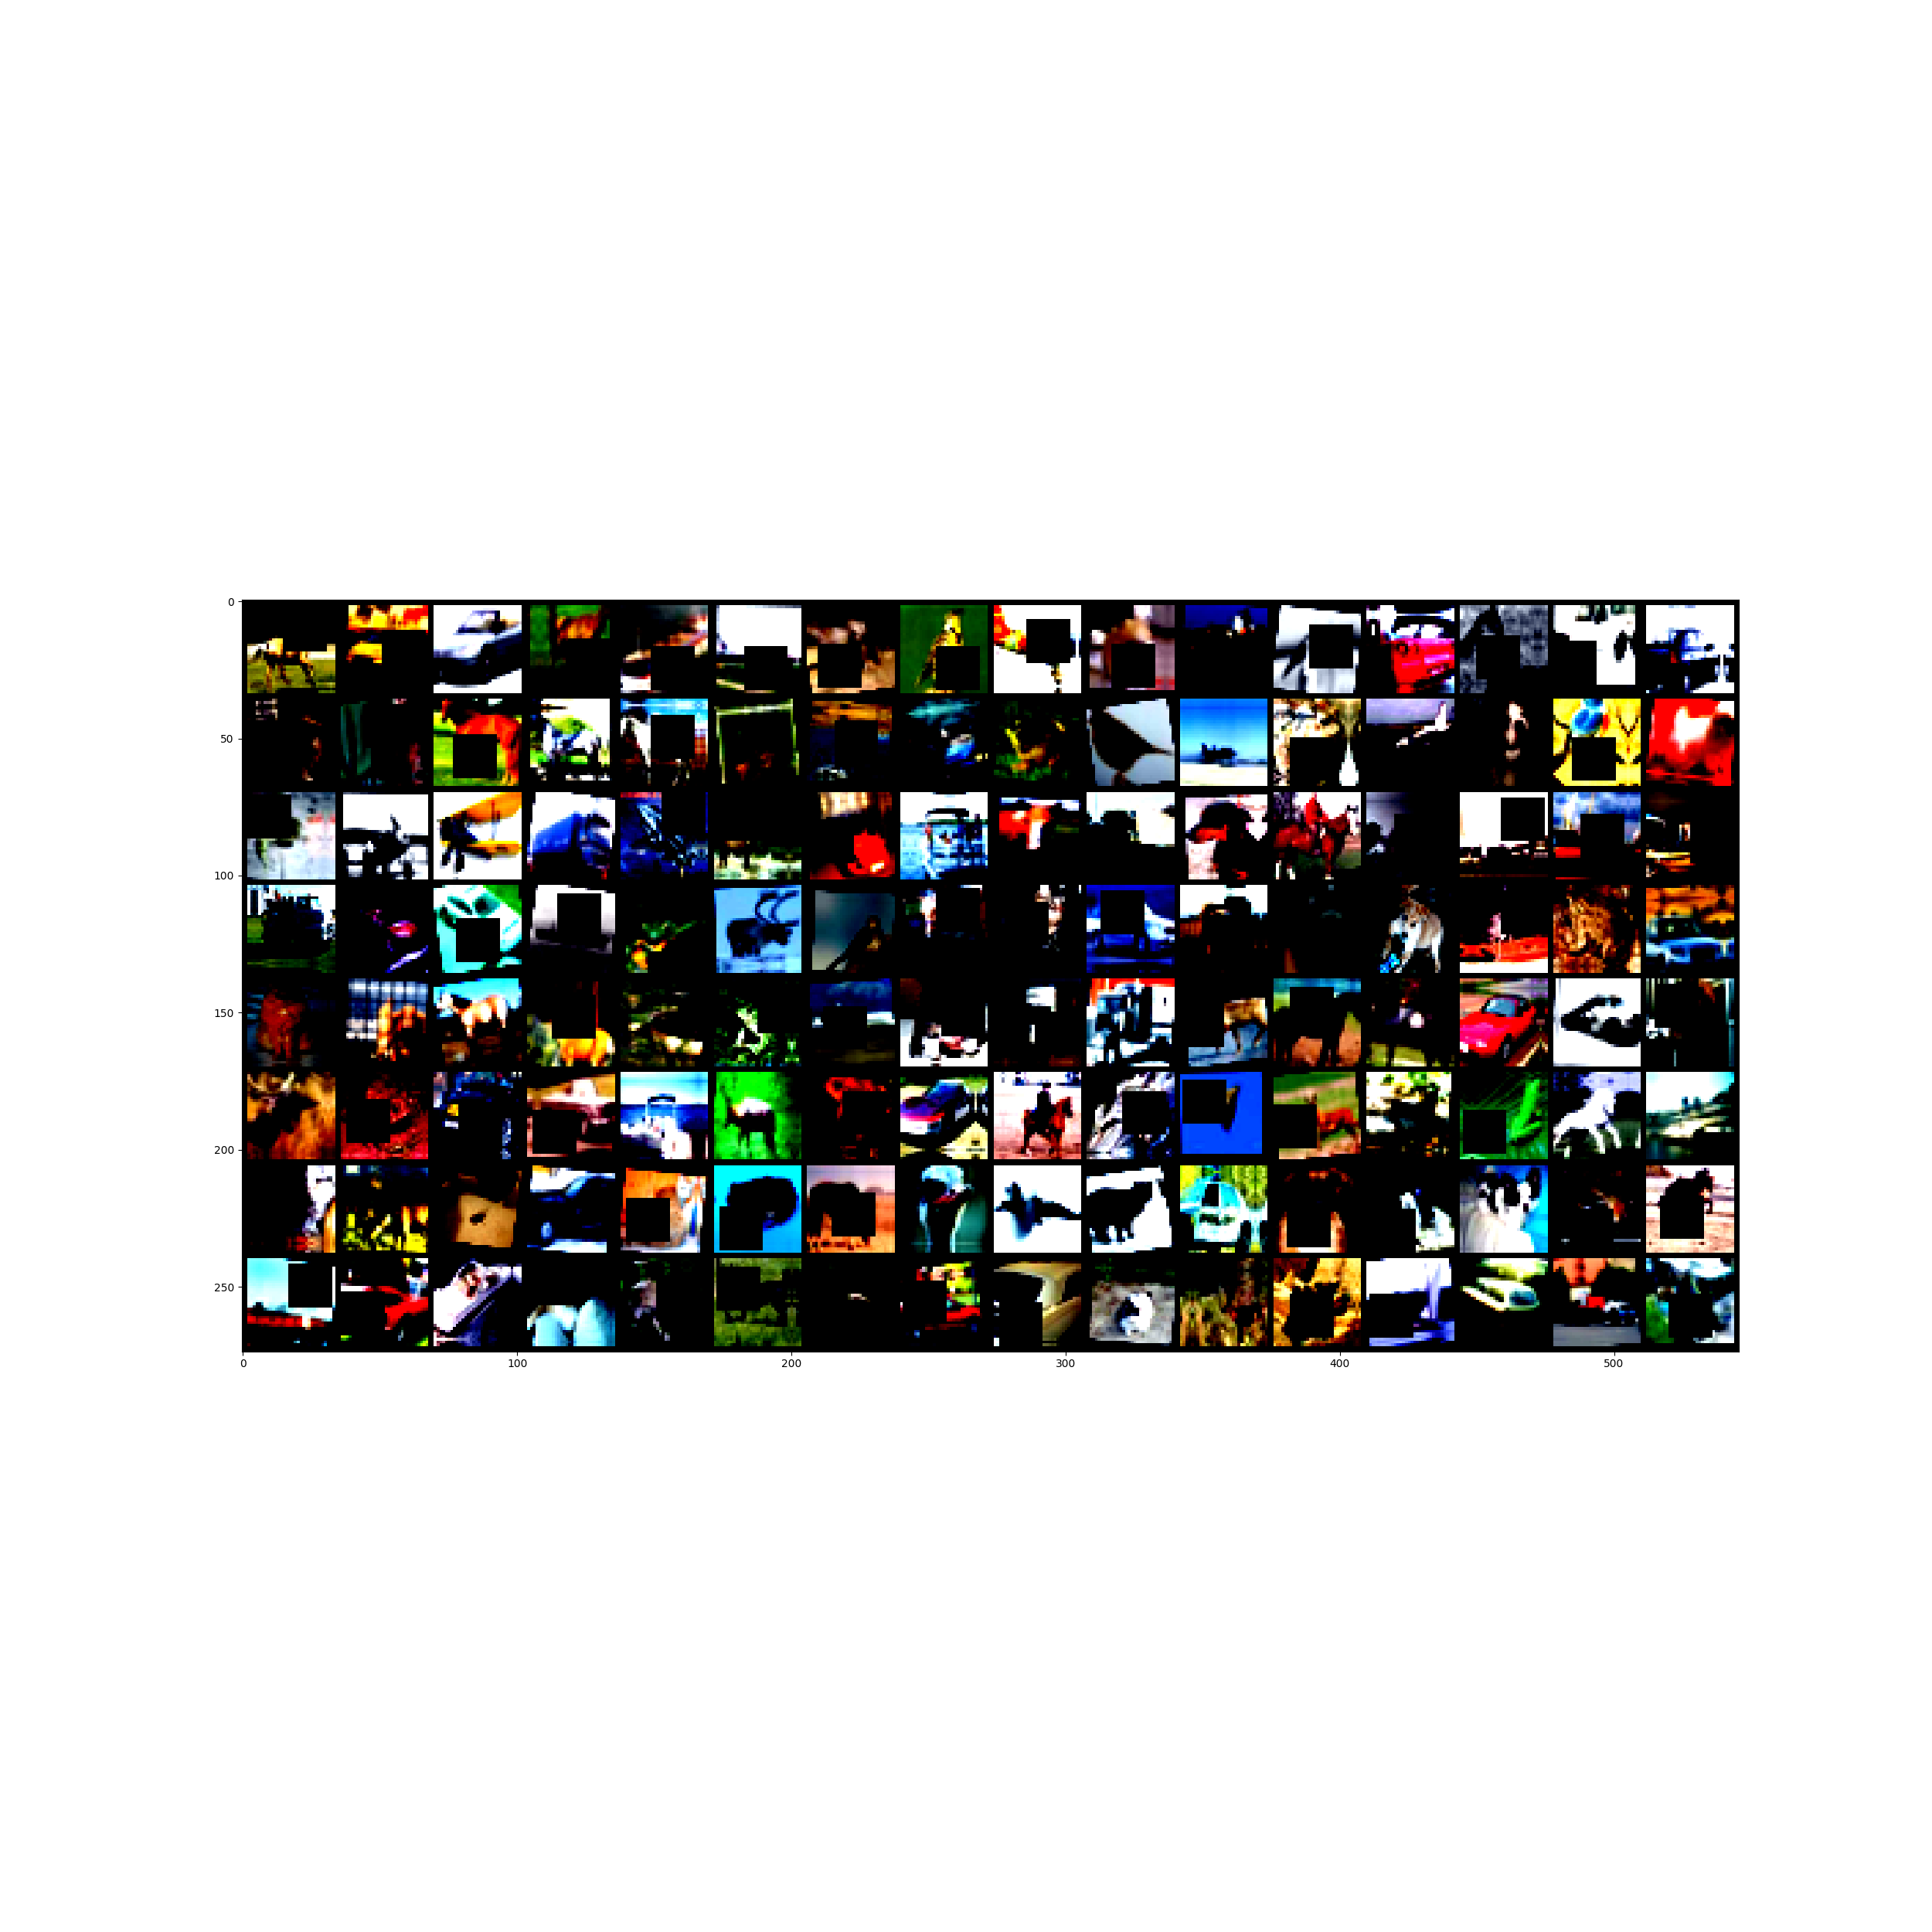

In [21]:
# Display the plot in the notebook
from IPython.display import Image
Image(filename='plot4.png')

### LR Range Test plot with best_lr location


> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence plot the *png plot files separately in separate cell.

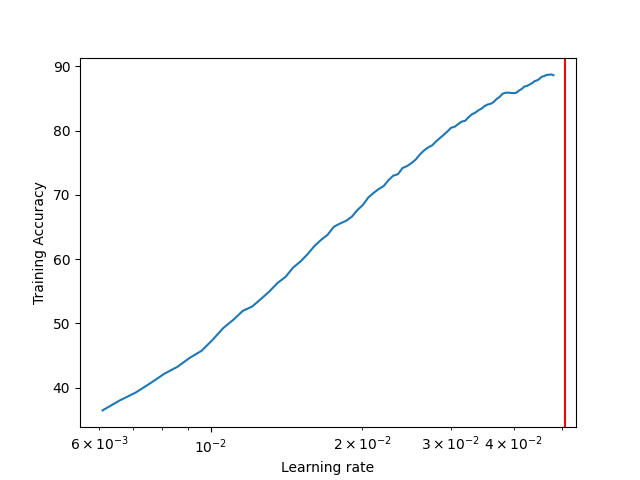

In [36]:
# Display the plot in the notebook
from IPython.display import Image
Image(filename='plot13.png')

### With the best_lr found from above "lr_find" run, model is trained by running the main.py script under "train" command

> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence intend to plot the files separately in separate cell.

In [16]:
%matplotlib inline
!python /content/EVA8_API/main.py --cmd train --best_lr 0.050499

CUDA Available? True

	Here are the different args values for this run:
	cmd : train
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 128
	epochs : 20
	criterion : NLLLoss()
	init_lr : 0.0001
	end_lr : 0.05
	lr_range_test_epochs : 100
	best_lr : 0.050499
	cycle_momentum : True
	optimizer : <class 'torch.optim.sgd.SGD'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  
Files already downloaded and verified

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 

### Model accuracy (train/test)


> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence plot the *png plot files separately in separate cell.

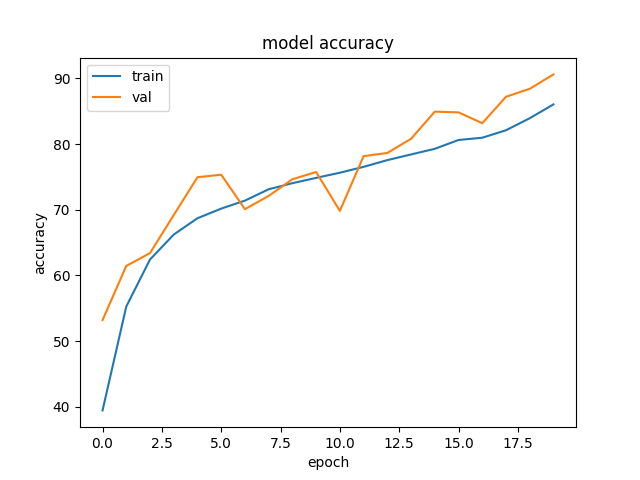

In [26]:
# Display the plot in the notebook
from IPython.display import Image
Image(filename='plot7.png')

### One Cycle, cyclic momentum and learning rate values

> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence plot the *png plot files separately in separate cell.

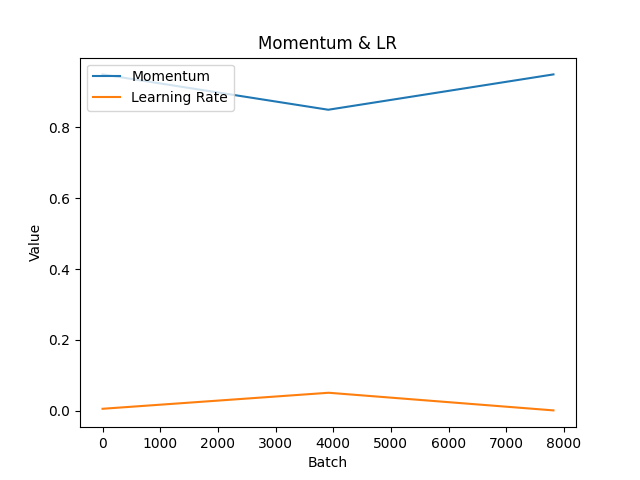

In [27]:
# Display the plot in the notebook
from IPython.display import Image
Image(filename='plot8.png')

### With the best_model found from above "train" run, saved best model above: CIFAR10_model_epoch-20_L1-1_L2-0_val_acc-90.6.h5 is loaded to get misclassified, & grad_cam on the misclassified ones, by running the main.py script under "test" command

> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence intend to plot the files separately in separate cell.

In [17]:
%matplotlib inline
!python /content/EVA8_API/main.py --cmd test --best_model CIFAR10_model_epoch-20_L1-1_L2-0_val_acc-90.6.h5

CUDA Available? True

	Here are the different args values for this run:
	cmd : test
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 128
	epochs : 20
	criterion : NLLLoss()
	init_lr : 0.0001
	end_lr : 0.05
	lr_range_test_epochs : 100
	best_lr : 0.504999999999
	cycle_momentum : True
	optimizer : <class 'torch.optim.sgd.SGD'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model : CIFAR10_model_epoch-20_L1-1_L2-0_val_acc-90.6.h5
Files already downloaded and verified

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000,

### model-prediction & mislabelled images

> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence plot the *png plot files separately in separate cell.

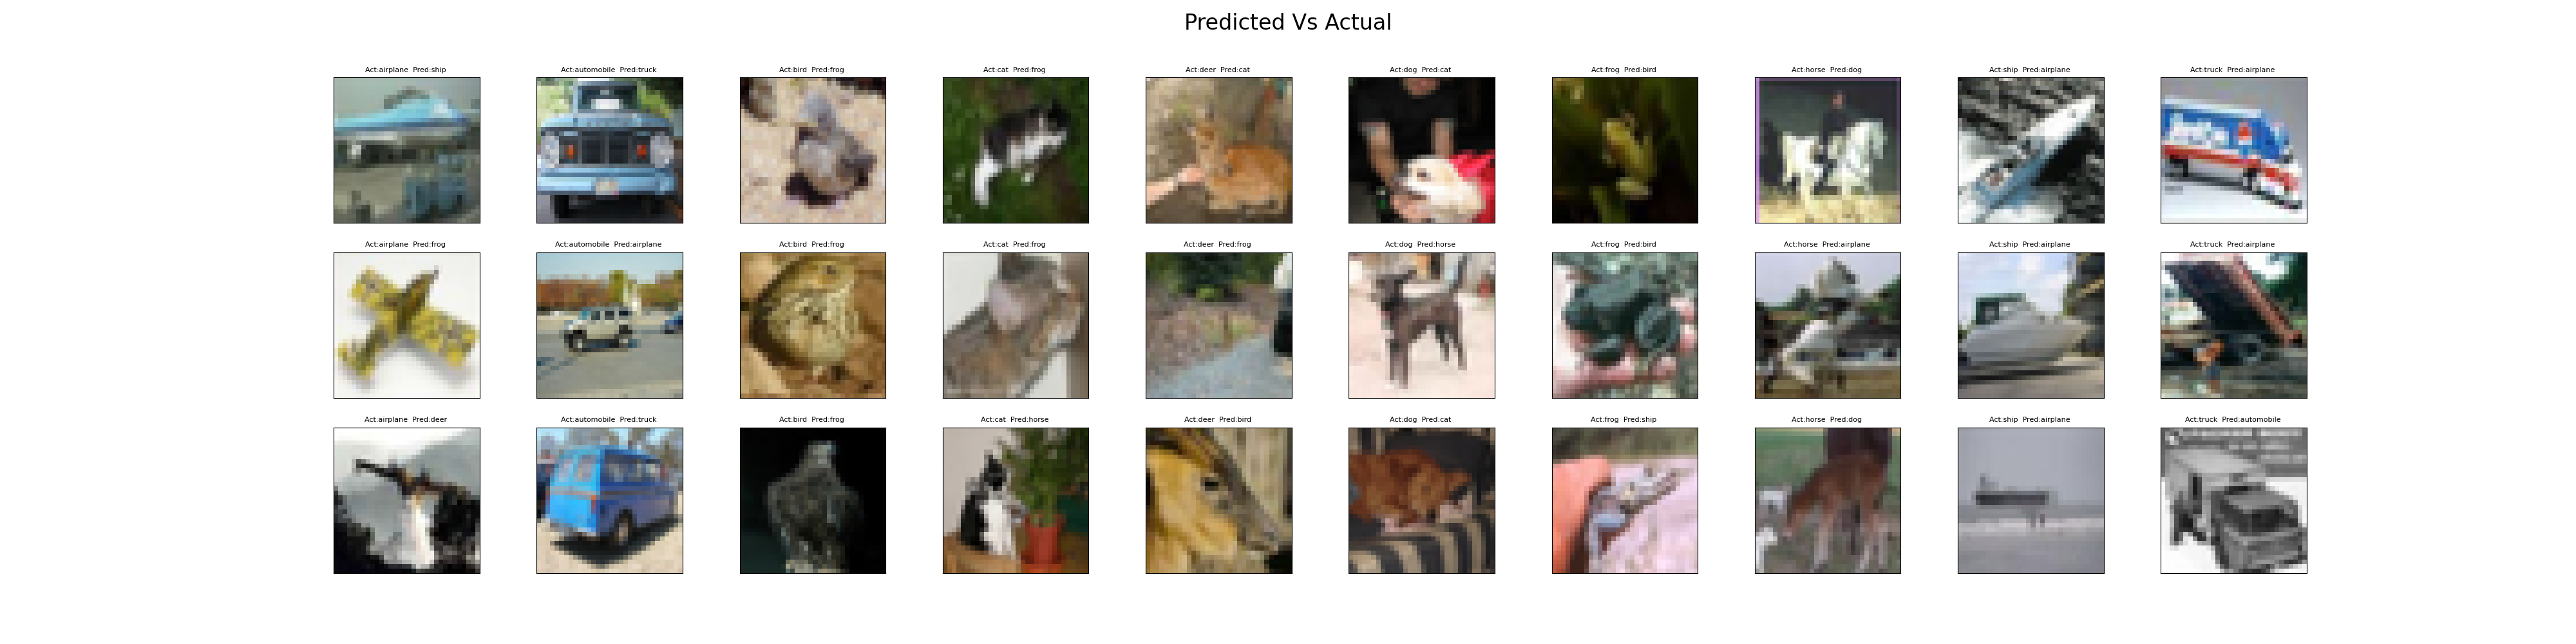

In [23]:
# Display the plot in the notebook
from IPython.display import Image
Image(filename='plot5.png')



> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence plot the *png plot files separately in separate cell.

### mislabelled images with grad-cam (on "layer3 for ResNet with 8x8 logits) heatmap superimposed

> please note that under this script mode the plots could not be inlined into the colab cell, hence had to be saved as *.png files, the places in the code where the plots are supposed to be inlined appear as:
Figure(800x300)
Figure(800x300)

or similar, hence plot the *png plot files separately in separate cell.

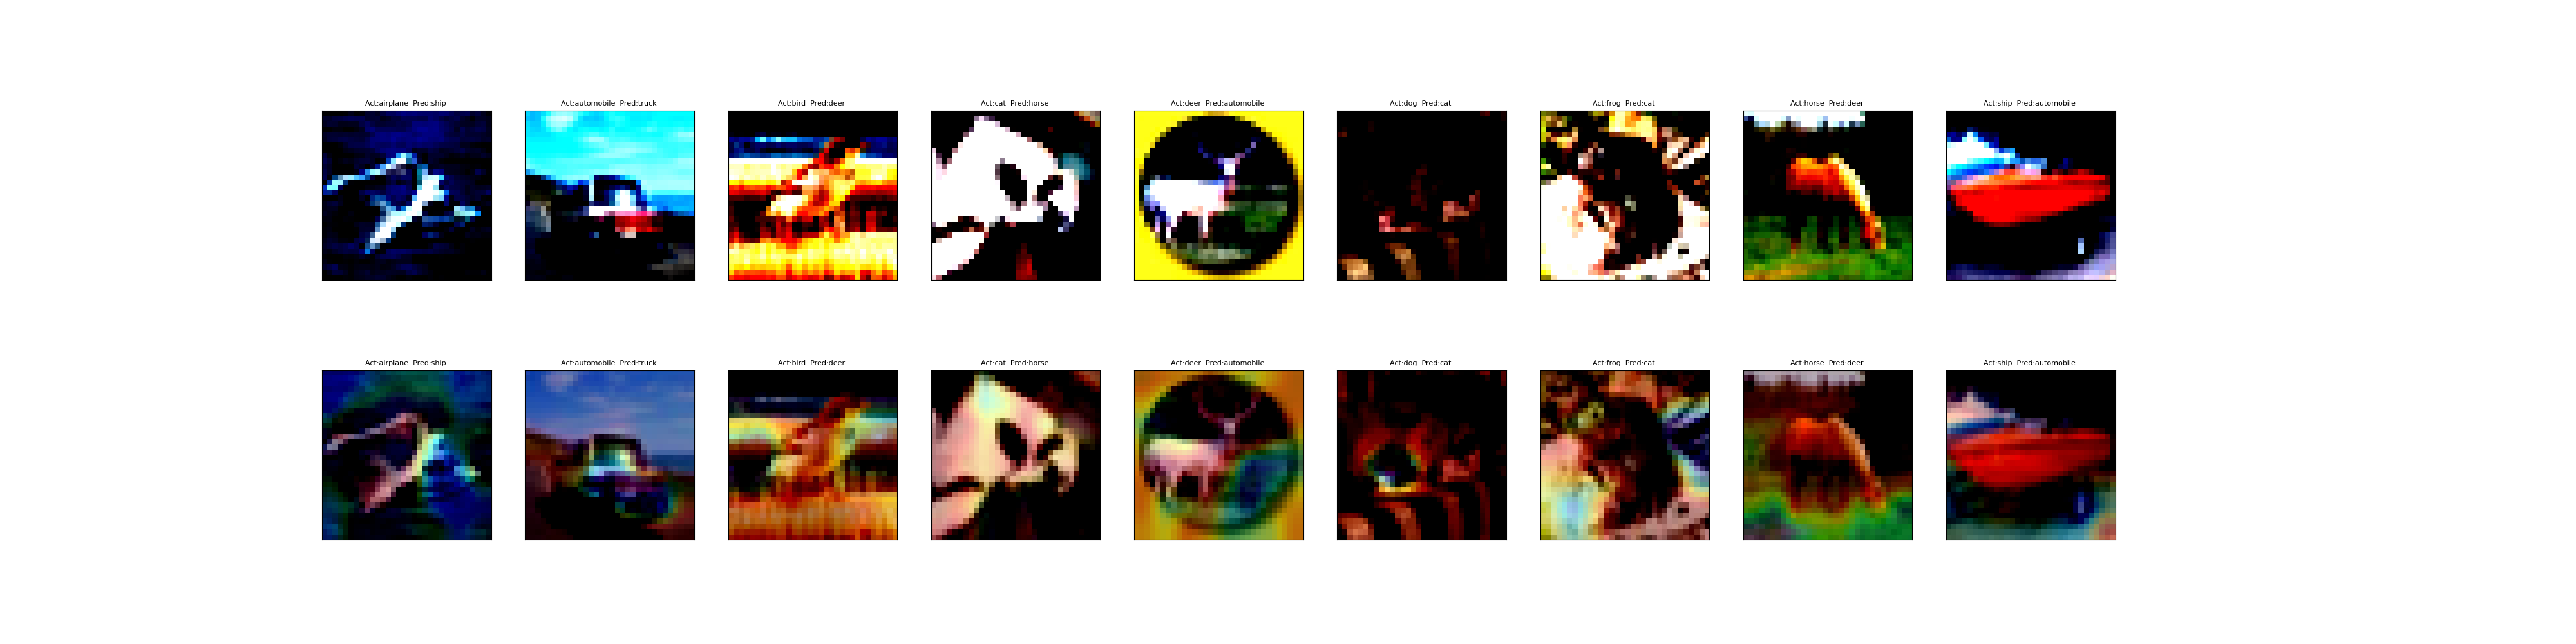

In [32]:
# Display the plot in the notebook
from IPython.display import Image
Image(filename='plot10.png')